# Census Income Classification


## 1. Load Libraries


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data Loading


In [45]:
df=pd.read_csv('/content/census-income (1).csv')

 to predict wheteher a person earns below 50k or above 50k

In [46]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [47]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' '],
      dtype='object')

In [48]:
df.columns=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Income']

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [50]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

## 3. Exploratory Data Analysis (EDA)


In [51]:
(df==' ?').sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,1843
relationship,0
race,0
sex,0


In [52]:
df.replace(' ?','nan',inplace=True)

In [53]:
(df==' ?').sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [54]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [55]:
df.duplicated().sum()

np.int64(24)

In [56]:
df.drop_duplicates(inplace=True)

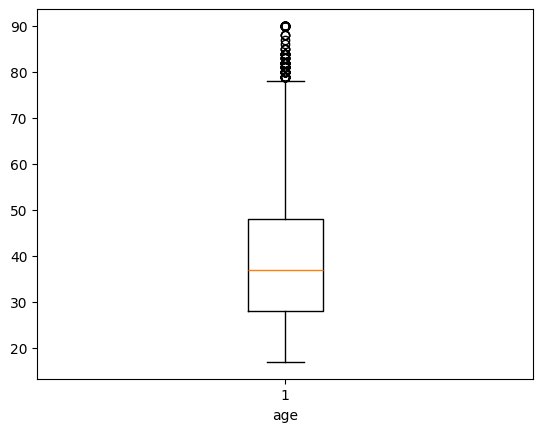

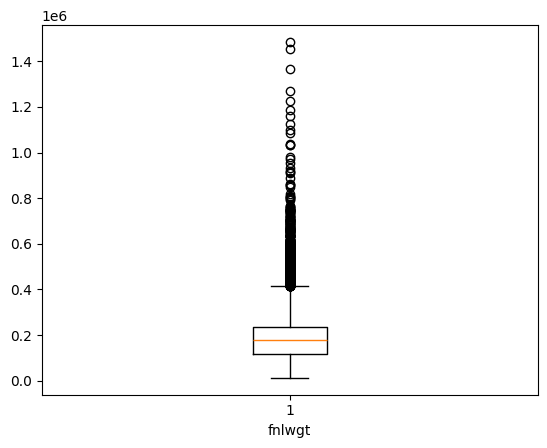

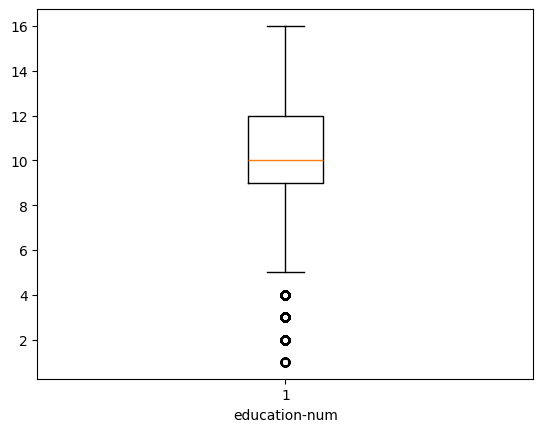

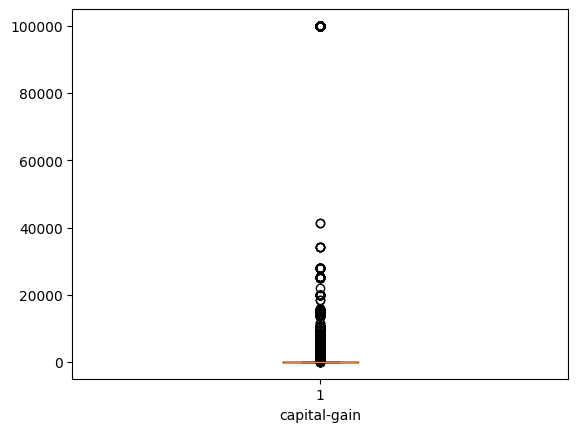

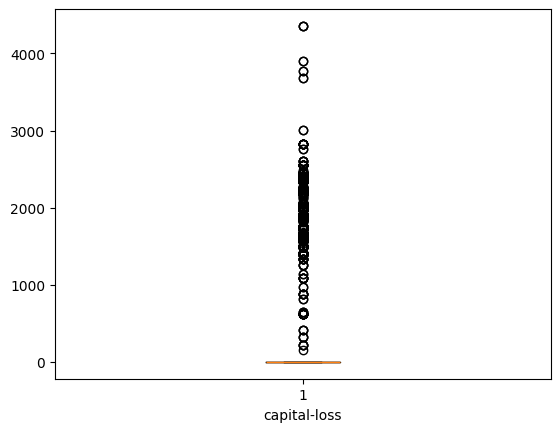

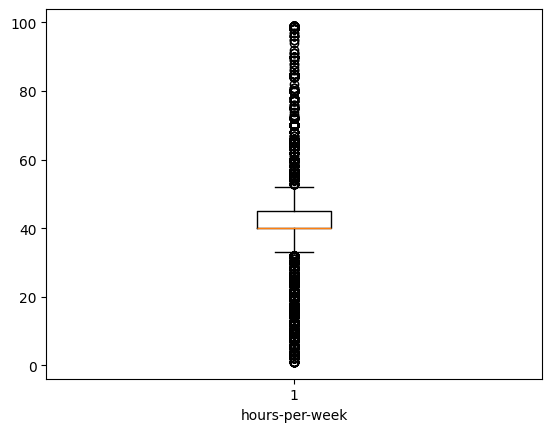

In [57]:
for i in df.columns:
  if df[i].dtypes!='object':
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.show()



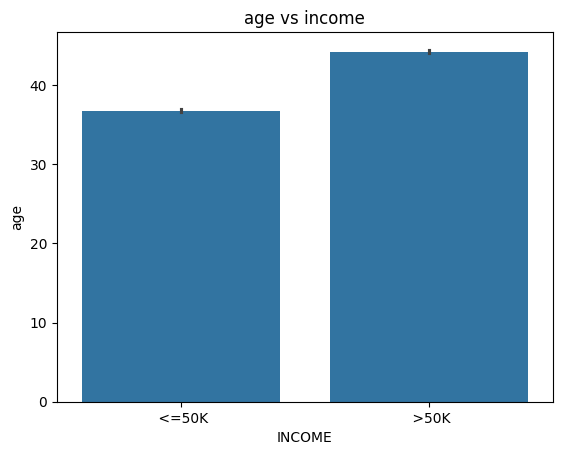

In [58]:
sns.barplot(x=df['Income'],y=df['age'])
plt.title('age vs income')
plt.xlabel('INCOME')
plt.ylabel('age')
plt.show()

people earning morethan 50k are older
so work experience is a major influencing factor

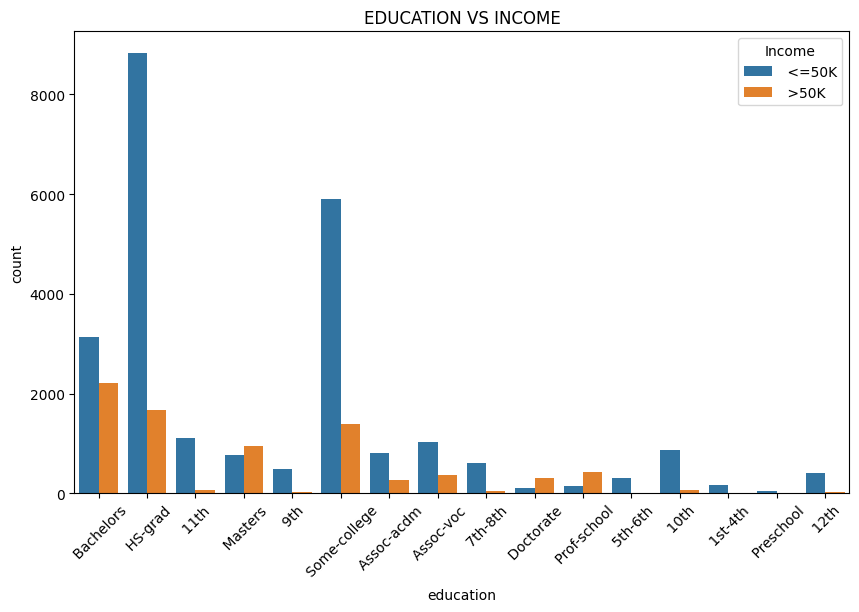

In [59]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['education'],hue=df['Income'])
plt.title('EDUCATION VS INCOME')
plt.xlabel('education')
plt.xticks(rotation=45)
plt.show()

## 4. Preprocessing


higher education levels have more people earning >50k

In [60]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
  if df[i].dtypes=='object':
    df[i]=le.fit_transform(df[i])


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32537 non-null  int64
 1   workclass       32537 non-null  int64
 2   fnlwgt          32537 non-null  int64
 3   education       32537 non-null  int64
 4   education-num   32537 non-null  int64
 5   marital-status  32537 non-null  int64
 6   occupation      32537 non-null  int64
 7   relationship    32537 non-null  int64
 8   race            32537 non-null  int64
 9   sex             32537 non-null  int64
 10  capital-gain    32537 non-null  int64
 11  capital-loss    32537 non-null  int64
 12  hours-per-week  32537 non-null  int64
 13  native-country  32537 non-null  int64
 14  Income          32537 non-null  int64
dtypes: int64(15)
memory usage: 4.0 MB


check whether our dataset is imbalanced or not before building the model

if one class is less than 10% otherwise greater than 60% then the dataset will be imbalanced

In [62]:
df['Income'].value_counts(normalize=True)*100

,proportion
Income,
0,75.907428
1,24.092572


In [63]:
x=df.drop(['Income'],axis=1)
y=df['Income']
from sklearn.model_selection import train_test_split

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [65]:
from imblearn.over_sampling import SMOTE

In [66]:
sm=SMOTE(random_state=42)
x_train_bal,y_train_bal=sm.fit_resample(x_train,y_train)

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler=StandardScaler()

In [69]:
scaler.fit(x_train_bal)

StandardScaler()

In [70]:
x_train_scaled=scaler.transform(x_train_bal)
x_test_scaled=scaler.transform(x_test)

## 5. Model Building


In [71]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [72]:
lr.fit(x_train_scaled,y_train_bal)

LogisticRegression()

In [73]:
y_pred=lr.predict(x_test_scaled)

In [74]:
from sklearn.metrics import *

## 6. Evaluation


In [75]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.75      0.83      4905
           1       0.51      0.79      0.62      1603

    accuracy                           0.76      6508
   macro avg       0.71      0.77      0.72      6508
weighted avg       0.82      0.76      0.78      6508

[[3696 1209]
 [ 337 1266]]


In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
dt=DecisionTreeClassifier(max_depth=8,random_state=32)
dt.fit(x_train_scaled,y_train_bal)

DecisionTreeClassifier(max_depth=8, random_state=32)

In [78]:
y_pred1=dt.predict(x_test_scaled)


In [79]:
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[4117  788]
 [ 396 1207]]
              precision    recall  f1-score   support

           0       0.91      0.84      0.87      4905
           1       0.61      0.75      0.67      1603

    accuracy                           0.82      6508
   macro avg       0.76      0.80      0.77      6508
weighted avg       0.84      0.82      0.82      6508



In [80]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train_scaled,y_train_bal)



RandomForestClassifier()

In [81]:
y_pred2=rf.predict(x_test_scaled)

In [82]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[4383  522]
 [ 482 1121]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      4905
           1       0.68      0.70      0.69      1603

    accuracy                           0.85      6508
   macro avg       0.79      0.80      0.79      6508
weighted avg       0.85      0.85      0.85      6508



## 7. Model Performance Comparison Summary

| Model | Accuracy | F1-Score |
|--------|------------|------------|
| Logistic Regression | 76% | 0.78 |
| Decision Tree | 82% | 0.82 |
| Random Forest | 85% | 0.85 |

 Conclusion:
- Logistic Regression performs well as a baseline model.
- Decision Tree captures non-linear patterns but may overfit.
- Random Forest gives the **best overall performance**, making it the most reliable model for this dataset.
